In [1]:
pip install tensorflow scikit-learn matplotlib pandas numpy

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached wrapt-1.17.2-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 648.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install soundfile


  Using cached cffi-1.17.1-cp311-cp311-win_amd64.whl.metadata (1.6 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.0 MB 660.6 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.0 MB 656.4 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.0 MB 819.2 kB/s eta 0:00:02
   -------- ------------------------------- 0.2/1.0 MB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.4/1.0 MB 1.7 MB/s eta 0:00:01
   ---------------------- ----------------- 0.6/1.0 MB 2.2 MB/s eta 0:00:01
   -------------------------------------- - 1.0/1.0 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 3.1 MB/s eta 0:00:00
Using cached cffi-1.17.1-cp311-cp311-win_amd64.whl (181 kB)
Using cached pycparser-2.22-py3-none-any.whl (117 kB)
Note: you may need to restart the kernel to use updated packages


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import numpy as np
import tensorflow as tf
import soundfile as sf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from scipy.signal import spectrogram



In [7]:
# Dataset yolu
DATA_PATH = r"E:\YapayZekaLab\Hafta-8\Uygulama-7\cats_dogs"
TRAIN_PATH = os.path.join(DATA_PATH, "train")
TEST_PATH = os.path.join(DATA_PATH, "test")
CLASSES = {'cat': 'kedi', 'dog': 'kopek'}
SAMPLE_RATE = 22050
DURATION = 2

# Ses dosyalarından spectrogram çıkar
def extract_features(file_path):
    try:
        signal, sr = sf.read(file_path)
        f, t, Sxx = spectrogram(signal, fs=sr)
        Sxx_log = np.log1p(Sxx)
        # Boyutu standardize et
        if Sxx_log.shape[0] >= 128 and Sxx_log.shape[1] >= 128:
            return Sxx_log[:128, :128]
        else:
            # Boyut küçükse, padding yap
            padded = np.zeros((128, 128))
            padded[:min(128, Sxx_log.shape[0]), :min(128, Sxx_log.shape[1])] = Sxx_log[:min(128, Sxx_log.shape[0]), :min(128, Sxx_log.shape[1])]
            return padded
    except Exception as e:
        print(f"Hata: {file_path} dosyası işlenirken sorun oluştu - {e}")
        return None

X, y = [], []
# Eğitim verilerini işle
for class_folder in os.listdir(TRAIN_PATH):
    class_path = os.path.join(TRAIN_PATH, class_folder)
    if os.path.isdir(class_path):
        class_label = CLASSES.get(class_folder, class_folder)
        print(f"{class_folder} sınıfı işleniyor...")
        for file_name in os.listdir(class_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(class_path, file_name)
                features = extract_features(file_path)
                if features is not None:
                    X.append(features)
                    y.append(list(CLASSES.keys()).index(class_folder))

# Verileri uygun formata dönüştür
X = np.array(X)[..., np.newaxis]  # (samples, height, width, channels)
y = np.array(y)

# Verileri böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


cat sınıfı işleniyor...
dog sınıfı işleniyor...


In [8]:
# Basit CNN Modeli
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(CLASSES), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Eğit
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)



Epoch 1/10


c:\Users\ataka\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5907 - loss: 0.6905 - val_accuracy: 0.5882 - val_loss: 0.6815
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6330 - loss: 0.6753 - val_accuracy: 0.5882 - val_loss: 0.6803
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6130 - loss: 0.6732 - val_accuracy: 0.5882 - val_loss: 0.6780
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6421 - loss: 0.6564 - val_accuracy: 0.5882 - val_loss: 0.6867
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6256 - loss: 0.6630 - val_accuracy: 0.5882 - val_loss: 0.6792
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6317 - loss: 0.6601 - val_accuracy: 0.5882 - val_loss: 0.6785
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5957 - loss: 0.6773 - val_accuracy: 0.5882 - val_loss: 0.6781
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6417 - loss: 0.6618 - val_accuracy: 0.5882 - val_loss: 0.6786
Epoch 9/10


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Accuracy: 0.5
F1 Score: 0.3333333333333333
Confusion Matrix: [[21  0]
 [21  0]]


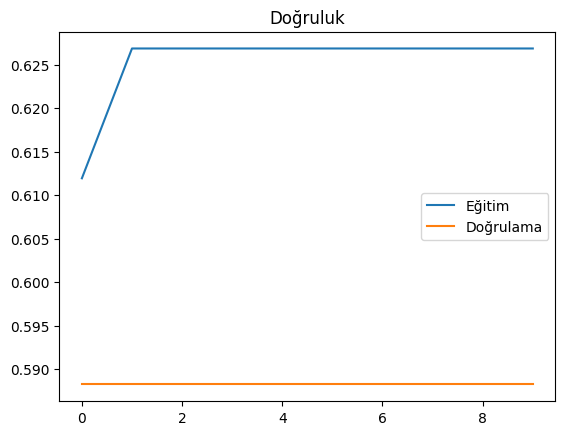

In [10]:
# Test & Sonuçlar
y_pred = np.argmax(model.predict(X_test), axis=1)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

# Grafik
plt.plot(history.history['accuracy'], label='Eğitim')
plt.plot(history.history['val_accuracy'], label='Doğrulama')
plt.title("Doğruluk")
plt.legend()
plt.show()